<a href="https://colab.research.google.com/github/tung1803/AI/blob/main/10TraiCay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

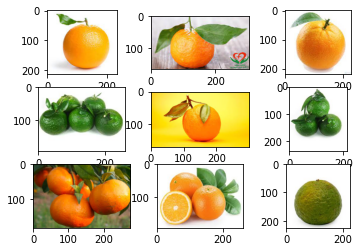

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/data/Trai_Cay/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'Cam.'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/data/Trai_Cay/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Cam'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Dao'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('DuaHau'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('DuDu'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Khe'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Le'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Oi'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Roi(Man)'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Sapoche'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Xoai'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10TraiCay_photos.npy', photos)
save('10TraiCay_labels.npy', labels)

(100, 200, 200, 3) (100,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
 history = model.fit(photos, labels, epochs=20, verbose=1)

Epoch 1/20
4/4 [==============================] - 7s 1s/step - loss: 1583.3408 - accuracy: 0.0900
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 693.9897 - accuracy: 0.1300
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 50.9500 - accuracy: 0.1900
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 1.5900 - accuracy: 0.5300
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.6236 - accuracy: 0.8100
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.1929 - accuracy: 0.9700
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.0534 - accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 5s 1s/step - loss: 0.0194 - accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 5s 1s/step - loss: 0.0149 - accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 5s 1s/step - loss: 0.0035 - accuracy: 1.0000
Epoch 11/20
4/4 [==========================

In [ ]:
model.evaluate(photos,labels)

4/4 [==============================] - 2s 365ms/step - loss: 0.0519 - accuracy: 1.0000


[0.05185936763882637, 1.0]

In [ ]:
model.save('10TraiCay_Final.h5')

In [ ]:
from keras.models import load_model
models=load_model('10TraiCay_Final.h5')

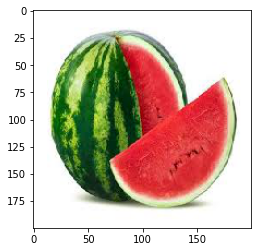

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('DuaHau.5.jpg', target_size=(200,200))
plt.imshow(img)

In [ ]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes

[[0.10485935 0.09950884 0.10743635 0.10087161 0.09611493 0.0953333
  0.09800417 0.09716143 0.09815874 0.10255128]]


[2]